AHMAD RAZA

Data Science Internship

Email : theahmadraza47@gmail.com

Project # 1

1. Data Cleaning

Load Dataset

In [11]:
import pandas as pd

# Load the dataset
file_path = 'Coffee Shop Sales.xlsx'
sales_data = pd.read_excel(file_path)

# Display the first few rows of the dataset
sales_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [12]:
# Check for missing values
missing_values = sales_data.isnull().sum()
print(missing_values)

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [13]:
# Check for duplicates
duplicates = sales_data.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Remove duplicates if any
sales_data = sales_data.drop_duplicates()

Duplicates: 0


In [14]:
# Check data types consistency
print(sales_data.dtypes)

# Convert transaction_date to datetime if not already
sales_data['transaction_date'] = pd.to_datetime(sales_data['transaction_date'])

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object


2. Profit /Loss Analysis

In [15]:
# Calculate total sales per product
sales_data['total_sales'] = sales_data['transaction_qty'] * sales_data['unit_price']
product_sales = sales_data.groupby('product_id').agg({
    'total_sales': 'sum',
    'transaction_qty': 'sum'
}).reset_index()

# Merge with product details for better visualization
product_details = sales_data[['product_id', 'product_category', 'product_type', 'product_detail']].drop_duplicates()
product_sales = product_sales.merge(product_details, on='product_id', how='left')

product_sales.head()

,product_id,total_sales,transaction_qty,product_category,product_type,product_detail
0,1,3852.00,214,Coffee beans,Organic Beans,Brazilian - Organic
1,2,3294.00,183,Coffee beans,House blend Beans,Our Old Time Diner Blend
2,3,2492.75,169,Coffee beans,Espresso Beans,Espresso Roast
3,4,3067.50,150,Coffee beans,Espresso Beans,Primo Espresso Roast
4,5,2220.00,148,Coffee beans,Gourmet Beans,Columbian Medium Roast


Visualize product sales

C:\Users\p\AppData\Local\Temp\ipykernel_26384\942944436.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='product_detail', y='total_sales', palette='viridis')


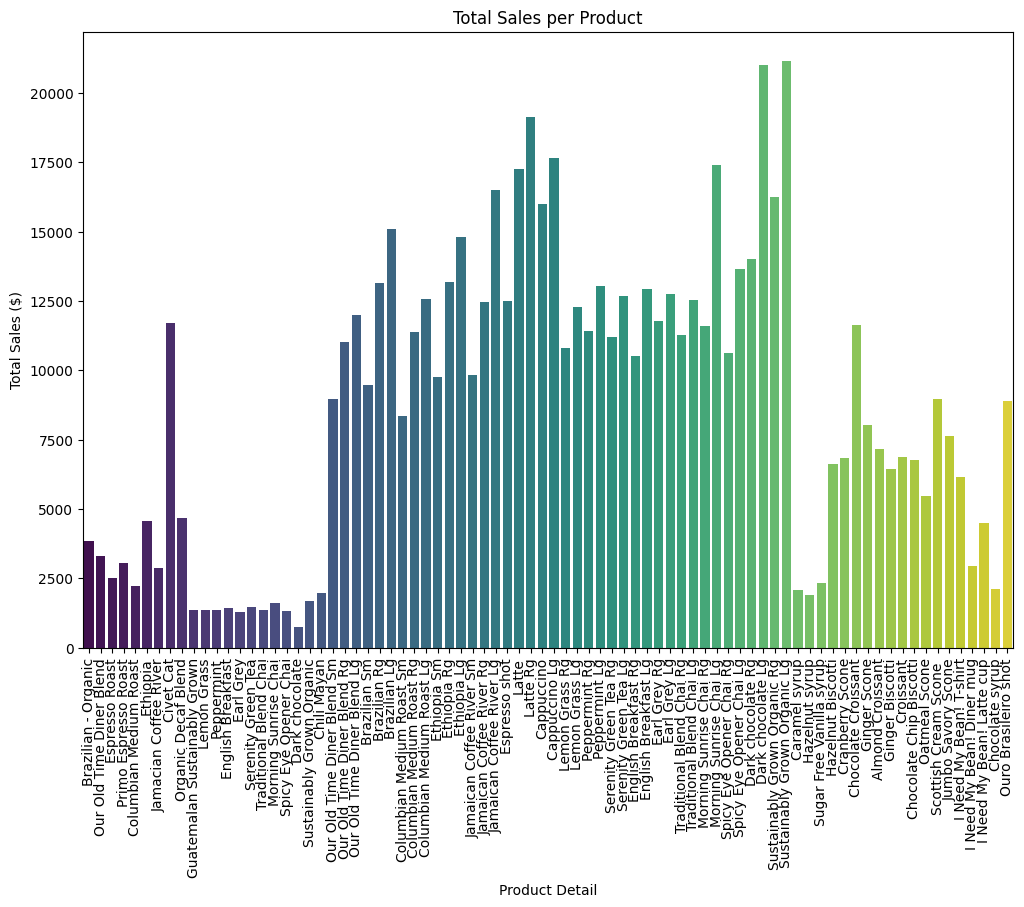

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for total sales per product
plt.figure(figsize=(12, 8))
sns.barplot(data=product_sales, x='product_detail', y='total_sales', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Sales per Product')
plt.xlabel('Product Detail')
plt.ylabel('Total Sales ($)')
plt.show()


3. Identify profitable and loss-making products:

In [17]:
# Sort products by total sales to identify profitable and loss-making products
product_sales = product_sales.sort_values(by='total_sales', ascending=False)
print(product_sales.head(10))  # Top 10 profitable products
print(product_sales.tail(10))  # Top 10 loss-making products

    product_id  total_sales  transaction_qty    product_category  \
60          61     21151.75             4453  Drinking Chocolate   
58          59     21006.00             4668  Drinking Chocolate   
38          39     19112.25             4497              Coffee   
40          41     17641.75             4151              Coffee   
54          55     17384.00             4346                 Tea   
37          38     17257.50             4602              Coffee   
35          36     16481.25             4395              Coffee   
59          60     16233.75             4329  Drinking Chocolate   
39          40     15997.50             4266              Coffee   
26          27     15109.50             4317              Coffee   

             product_type                product_detail  
60          Hot chocolate  Sustainably Grown Organic Lg  
58          Hot chocolate             Dark chocolate Lg  
38       Barista Espresso                      Latte Rg  
40       Barista Es

3. Profit Increase Prediction

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection
features = sales_data[['transaction_qty', 'unit_price']]
target = sales_data['total_sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
#model = LinearRegression()
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Analyze feature importances
feature_importances = model.feature_importances_
print(f'Feature Importances: {feature_importances}')

Mean Squared Error: 1.7203226362259763e-27
R2 Score: 1.0
Feature Importances: [0.63632676 0.36367324]


4. Loss Mitigation

In [19]:
# Analyze loss-making products
# Define threshold for low sales
low_sales_threshold = 1000  # example threshold for low sales

# Identify low-sales products
low_sales_products = product_sales[product_sales['total_sales'] < low_sales_threshold]
print(low_sales_products)

# Develop strategies (example)
strategies = []
for index, row in low_sales_products.iterrows():
    strategies.append({
        'product_id': row['product_id'],
        'product_detail': row['product_detail'],
        'strategy': 'Reduce cost price' if row.get('total_cost', 0) > row['total_sales'] else 'Increase marketing efforts'
    })
strategies_df = pd.DataFrame(strategies)
print(strategies_df)


    product_id  total_sales  transaction_qty    product_category  \
18          19        755.2              118  Packaged Chocolate   

          product_type  product_detail  
18  Drinking Chocolate  Dark chocolate  
   product_id  product_detail                    strategy
0          19  Dark chocolate  Increase marketing efforts


Save the cleaned dataset:

In [20]:
sales_data.to_excel('Cleaned_Coffee_Shop_Sales.xlsx', index=False)

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

C:\Users\p\AppData\Local\Temp\ipykernel_26384\1857366304.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_revenue, x='product_detail', y='total_revenue', palette='coolwarm')


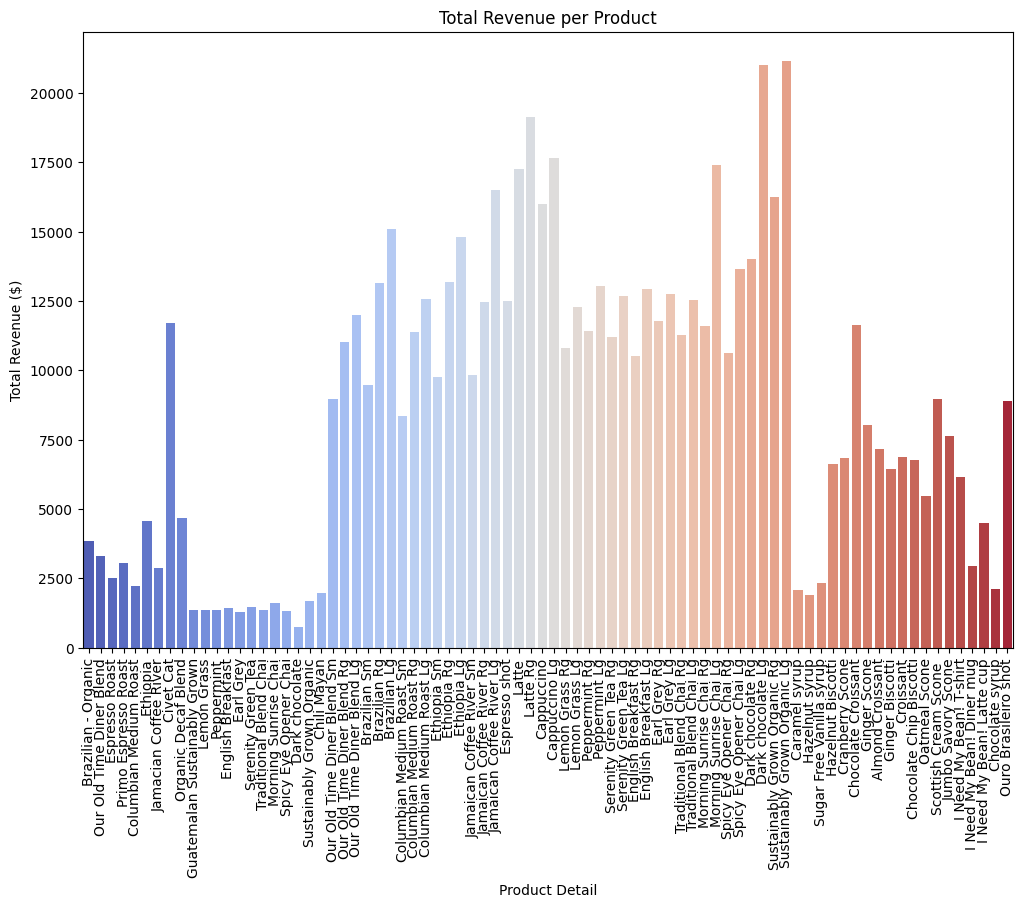

Top 10 Profitable Products:
     product_id  total_revenue  transaction_qty    product_category  \
60          61       21151.75             4453  Drinking Chocolate   
58          59       21006.00             4668  Drinking Chocolate   
38          39       19112.25             4497              Coffee   
40          41       17641.75             4151              Coffee   
54          55       17384.00             4346                 Tea   
37          38       17257.50             4602              Coffee   
35          36       16481.25             4395              Coffee   
59          60       16233.75             4329  Drinking Chocolate   
39          40       15997.50             4266              Coffee   
26          27       15109.50             4317              Coffee   

             product_type                product_detail  
60          Hot chocolate  Sustainably Grown Organic Lg  
58          Hot chocolate             Dark chocolate Lg  
38       Barista Espresso 

In [22]:
# %% [markdown]
# ### 1. Data Cleaning

# %% [markdown]
# #### Load Dataset

# %%
import pandas as pd

# Load the dataset
file_path = 'Coffee Shop Sales.xlsx'
data = pd.read_excel(file_path)

# Display the initial rows of the dataset
print(data.head())

# %% [markdown]
# #### Check for Missing Values

# %%
# Summarize missing values in each column
missing_data = data.isnull().sum()
print("Missing values in each column:\n", missing_data)

# %% [markdown]
# #### Handle Duplicates

# %%
# Identify and remove duplicate rows
duplicate_rows = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

data = data.drop_duplicates()

# %% [markdown]
# #### Verify Data Consistency

# %%
# Print data types of each column
print(data.dtypes)

# Ensure 'transaction_date' column is in datetime format
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# %% [markdown]
# ### 2. Profit/Loss Analysis

# %%
# Calculate total sales per product
data['total_revenue'] = data['transaction_qty'] * data['unit_price']
product_revenue = data.groupby('product_id').agg({
    'total_revenue': 'sum',
    'transaction_qty': 'sum'
}).reset_index()

# Merge with product details for more context
product_info = data[['product_id', 'product_category', 'product_type', 'product_detail']].drop_duplicates()
product_revenue = product_revenue.merge(product_info, on='product_id', how='left')

print(product_revenue.head())

# %% [markdown]
# #### Visualize Product Sales

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for total sales per product
plt.figure(figsize=(12, 8))
sns.barplot(data=product_revenue, x='product_detail', y='total_revenue', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Total Revenue per Product')
plt.xlabel('Product Detail')
plt.ylabel('Total Revenue ($)')
plt.show()

# %% [markdown]
# #### Identify Profitable and Loss-Making Products

# %%
# Sort products by total sales to identify the most and least profitable items
sorted_products = product_revenue.sort_values(by='total_revenue', ascending=False)
print("Top 10 Profitable Products:\n", sorted_products.head(10))
print("Top 10 Loss-Making Products:\n", sorted_products.tail(10))

# %% [markdown]
# ### 3. Profit Increase Prediction

# %%
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = data[['transaction_qty', 'unit_price']]
y = data['total_revenue']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a RandomForestRegressor model
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Determine feature importances
importance = regressor.feature_importances_
print(f'Feature Importances: {importance}')

# %% [markdown]
# ### 4. Loss Mitigation

# %%
# Define a threshold for low sales
low_sales_limit = 1000  # Example threshold for low sales

# Identify products with low sales
underperforming_products = sorted_products[sorted_products['total_revenue'] < low_sales_limit]
print(underperforming_products)

# Develop strategies for each low-sales product
strategies = []
for index, row in underperforming_products.iterrows():
    strategies.append({
        'product_id': row['product_id'],
        'product_detail': row['product_detail'],
        'suggested_strategy': 'Reduce cost' if row.get('total_cost', 0) > row['total_revenue'] else 'Increase marketing'
    })

strategy_df = pd.DataFrame(strategies)
print(strategy_df)

# %% [markdown]
# #### Save the Cleaned Dataset


